# Kmeans算法

- K:初始质点的个数 (计划想要簇类数)
- means:中心点到其它数据点距离的平均数
K的范围：1~n

K的范围：1~n

一个数据集，其中每个观察的示例都有一组特征，但没有标签-没法分类，找到彼此相似的数据聚集-类聚
- 根据质心将数据划分，每个数据距离哪个质心最近就把它划分到哪个聚类中
- 根据数据计算出聚类的质心，数据点的坐标平均值为新质心

样本点分配
$$
\[
c^{(i)} := \arg\min_{j} \|x^{(i)} - \mu_j\|^2
\]
$$

簇中心更新
$$
\[
\mu_j := \frac{\sum_{i=1}^m 1\{c^{(i)} = j\} x^{(i)}}{\sum_{i=1}^m 1\{c^{(i)} = j\}}
\]
$$
这样迭代，直到收敛，达到一种稳定状态

其中 ∥⋅∥^2 表示欧式距离平方(欧几里得距离)，1{c^(i)=j}是指示函数(当样本属于簇j时为1，否则为0)

**K-means的优化目标是最小化簇内平方误差-WCSS**


$$
\[
\text{WCSS} = \sum_{j=1}^k \sum_{x^{(i)} \in C_j} \| x^{(i)} - \mu_j \|^2
\]
$$

In [70]:
# 导入必要库
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# 从sklearn导入StandardScaler数据预处理工具
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA  # 导入PCA用于降维

# 设置绘图大小
plt.style.use({'figure.figsize':(25,20)})

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来显示正常负号

In [71]:
# pandas里的read_csv命令读取外部文件
Iris=pd.read_csv('iris.csv',encoding='gbk')  

iris数据集可视化

In [72]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [73]:
Iris.columns
#  花萼长度 花萼宽度 花瓣长度 花瓣宽度 种类

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

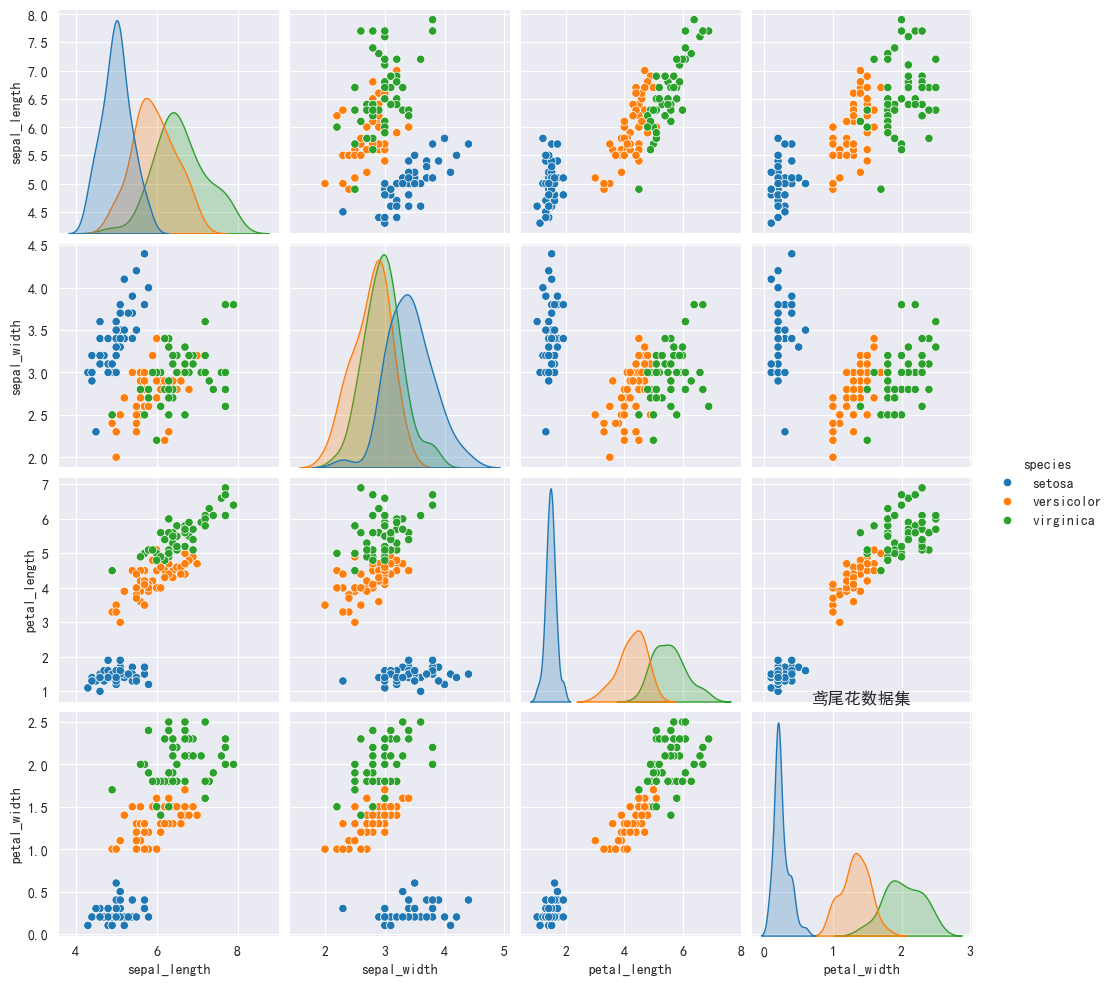

In [74]:
# 可视化数据分布的成对图
sns.pairplot(Iris, hue='species')
plt.title("鸢尾花数据集")
plt.show()

In [75]:
# 数据预处理
Iris_X=Iris.iloc[:,:-1].values    # 除最后一列
Iris_y=Iris.iloc[:,-1].values     #最后一列

In [76]:
# Kmeans算法的类封装
class Kmeans:
    # 初始化
    def __init__(self,n_clusters,max_iter=300,tolerance=1e-4):
        # 参数说明
        self.n_clusters=n_clusters   # 簇的质心个数
        self.max_iter=max_iter       # 最大迭代数
        self.tolerance=tolerance     # 收敛容忍度
        self.centroids=None          # 存储每个簇的质心
        self.labels=None              # 存储每个样本所属的簇的标签
        
    # 拟合 fit用于训练Kmeans模型，接收特征矩阵Iris_X
    def fit(self,X):
        # 随机选择开始时的质心
        random_indices=np.random.choice(X.shape[0],self.n_clusters,replace=False)
        self.centroids=X[random_indices]
        
        for i in range(self.max_iter):
            # 根据最近的质心为数据点分配标签
            self.labels=self._assign_labels(X)
            
            # 根据数据点的平均值重新更新质心
            new_centroids=self._calculate_centroids(X)
            
            # 是否到达收敛条件，到达收敛条件即break
            if np.all(np.abs(new_centroids-self.centroids)<self.tolerance):
                break
            # 更新质心
            self.centroids=new_centroids
            
    # 实现标签分配
    def _assign_labels(self,X):
        # 先计算样本点与各个聚类质心的距离，再分配标签
                  # 计算差值的欧几里得距离
        distances=np.linalg.norm(X[:,np.newaxis]-self.centroids,axis=2)
        return np.argmin(distances,axis=1)
            # 使用 np.argmin 函数找到每个样本距离最小的聚类中心的索引，即将样本分配给最近的聚类中心 
    # 实现质心更新
    def _calculate_centroids(self,X):
        # 计算每个聚类的新质心
              # 将新质心转换为Numpy数组返回
        return np.array([X[self.labels==k].mean(axis=0) for k in range(self.n_clusters)])
    # 预测
    def predict(self,X):
        # 根据当前的质心对新数据点进行标签分配
        return self._assign_labels(X)
    
    

In [77]:
# 选取特征花萼特征: 花萼宽度，花萼长度
Iris_X_1=Iris.iloc[:,[0,1]].values

In [78]:
# 特征标准化
scaler=StandardScaler()
Iris_X_1_scaled=scaler.fit_transform(Iris_X_1)

In [79]:
# 创建Kmeans实例并拟合数据
kmeans=Kmeans(n_clusters=3,max_iter=300,tolerance=1e-4)
kmeans.fit(Iris_X_1_scaled)
# 预测标签
predict_labels=kmeans.predict(Iris_X_1_scaled)

In [80]:
# 将结果合并为DataFrame
result_df = pd.DataFrame(Iris_X_1_scaled, columns=['sepal_length', 'sepal_width'])  # 包含标准化后的特征
result_df['cluster'] = predict_labels                   # 添加聚类结果标签
result_df['species'] = Iris.iloc[:, -1]             # 添加鸢尾花的类别列


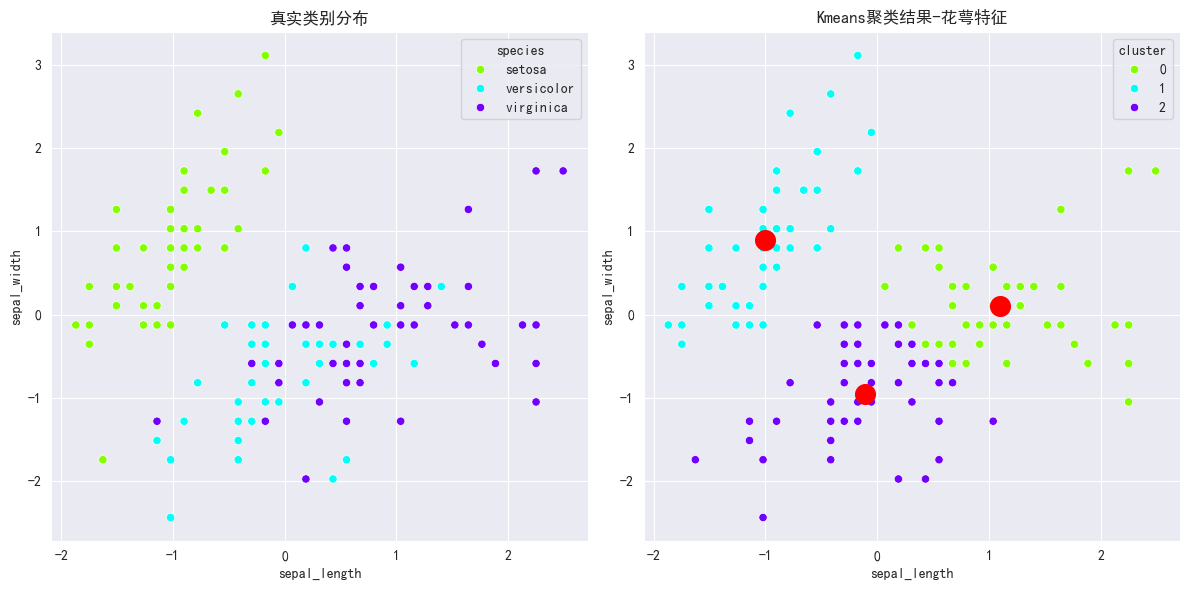

In [81]:
# 绘制聚类结果（二维特征）
plt.figure(figsize=(12, 6))

# 绘图
# 子图1：真实类别对比
plt.subplot(1, 2, 1)   # 一行两列的图，在第一个子图
sns.scatterplot(
    x='sepal_length', y='sepal_width',
    hue='species',
    palette=sns.color_palette("hsv", 3),
    data=result_df,
    legend='full'
)
plt.title("真实类别分布")

# 子图2：聚类结果
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='sepal_length', y='sepal_width',
    hue='cluster',
    palette=sns.color_palette("hsv", 3),
    data=result_df,
    legend='full'
)
# 绘制质心（直接使用标准化后的质心）
plt.scatter(
    kmeans.centroids[:, 0], kmeans.centroids[:, 1],
    marker='o', s=200, c='red',
    label='质心'
)
plt.title("Kmeans聚类结果-花萼特征")

plt.tight_layout()
plt.show()

In [82]:
# 计算WCSS来衡量Kmeans算法的类聚效果
WCSS = sum(np.min(np.linalg.norm(Iris_X_1_scaled[:, np.newaxis] - kmeans.centroids, axis=2)**2, axis=1))
print(f'WCSS: {WCSS}')

WCSS: 103.80692090161445


- WCSS越小：数据点离所属簇的质心越近，簇内样本越紧密，聚类效果越好。
- WCSS越大：数据点离质心越远，簇内样本越分散，聚类效果越差。

In [83]:
# 选取特征花瓣特征: 花瓣宽度，花瓣长度
Iris_X_2=Iris.iloc[:,[2,3]].values

In [84]:
# 特征标准化
scaler=StandardScaler()
Iris_X_2_scaled=scaler.fit_transform(Iris_X_2)

In [85]:
# 创建Kmeans实例并拟合数据
kmeans=Kmeans(n_clusters=3,max_iter=300,tolerance=1e-4)
kmeans.fit(Iris_X_2_scaled)
# 预测标签
predict_labels=kmeans.predict(Iris_X_2_scaled)

In [86]:
# 将结果合并为DataFrame
result_df = pd.DataFrame(Iris_X_2_scaled, columns=['petal_length', 'petal_width'])  
result_df['cluster'] = predict_labels    
result_df['species'] = Iris.iloc[:, -1]  


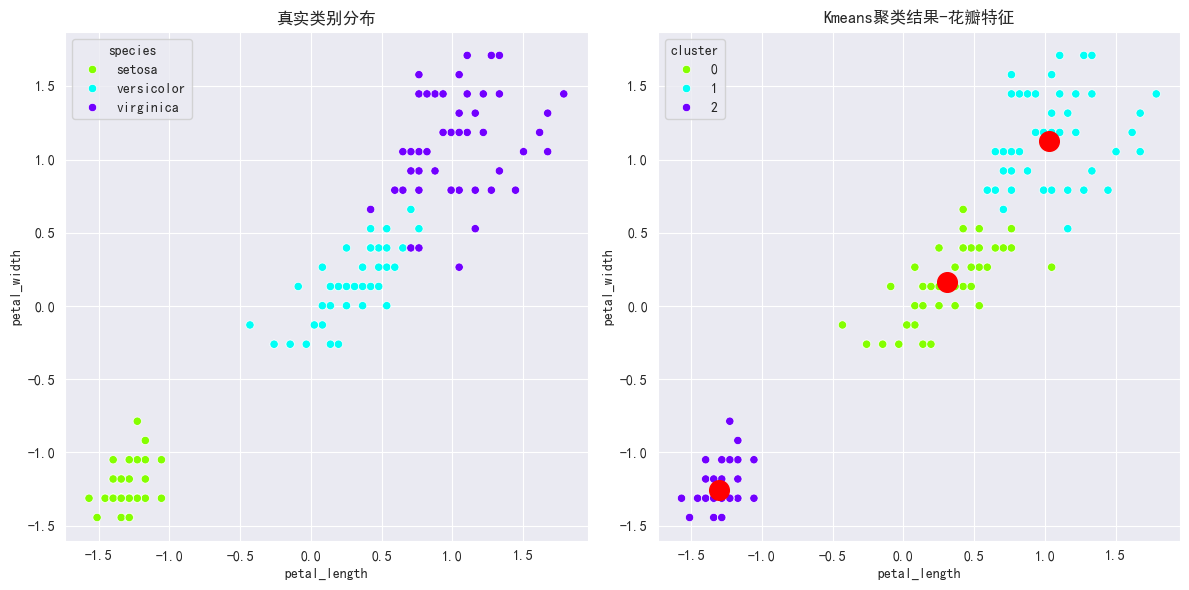

In [87]:
# 绘制聚类结果（二维特征）
plt.figure(figsize=(12, 6))

# 绘图
# 子图1：真实类别对比
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='petal_length', y='petal_width',
    hue='species',
    palette=sns.color_palette("hsv", 3),
    data=result_df,
    legend='full'
)
plt.title("真实类别分布")

# 子图2：聚类结果
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='petal_length', y='petal_width',
    hue='cluster',
    palette=sns.color_palette("hsv", 3),
    data=result_df,
    legend='full'
)
# 绘制质心（直接使用标准化后的质心）
plt.scatter(
    kmeans.centroids[:, 0], kmeans.centroids[:, 1],
    marker='o', s=200, c='red',
    label='质心'
)
plt.title("Kmeans聚类结果-花瓣特征")

plt.tight_layout()
plt.show()

In [88]:
# 计算WCSS来衡量Kmeans算法的类聚效果
WCSS = sum(np.min(np.linalg.norm(Iris_X_2_scaled[:, np.newaxis] - kmeans.centroids, axis=2)**2, axis=1))
print(f'WCSS: {WCSS}')

WCSS: 18.046983891906265
